In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [2]:
# Load JSON data
with open('../dist/resultats-eu2024.json') as f:
    data = json.load(f)

# Flatten JSON data into a DataFrame
rows = []
for commune in data:
    for resultat in commune['resultats']:
        rows.append({
            'codeCommune': commune['codeCommune'],
            'nomCommune': commune['nomCommune'],
            'nomListe': resultat['nomListe'],
            'nbVoix': resultat['nbVoix'],
        })
df = pd.DataFrame(rows)

# Determine the party with the most votes in each commune
df['nbVoix'] = df['nbVoix'].astype(int)  # Ensure votes are integers
winning_party = df.loc[df.groupby('codeCommune')['nbVoix'].idxmax()]['nomListe']
winning_party = df.loc[df.groupby('codeCommune')['nbVoix'].idxmax()][['codeCommune', 'nomListe', 'nbVoix']]
winning_party.columns = ['insee', 'nomListe', 'Votes']

# print(winning_party)
print(winning_party['nomListe'].value_counts())

nomListe
La FRANCE REVIENT                                                          32478
REVEIL EUR                                                                   931
BESOIN D'EUROPE                                                              694
LFI - UP                                                                     286
AR                                                                           184
LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE                 115
EUROPE ÉCOLOGIE                                                               58
LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR       28
GAUCHE UNIE                                                                   16
EUROPE TERRITOIRES ÉCOLOGIE                                                    5
L'EUROPE CA SUFFIT !                                                           2
LISTE ASSELINEAU-FREXIT                                                        1
EAC                

In [3]:
gdf = gpd.read_file('../data/communes-20220101-shp/communes-20220101.shp')

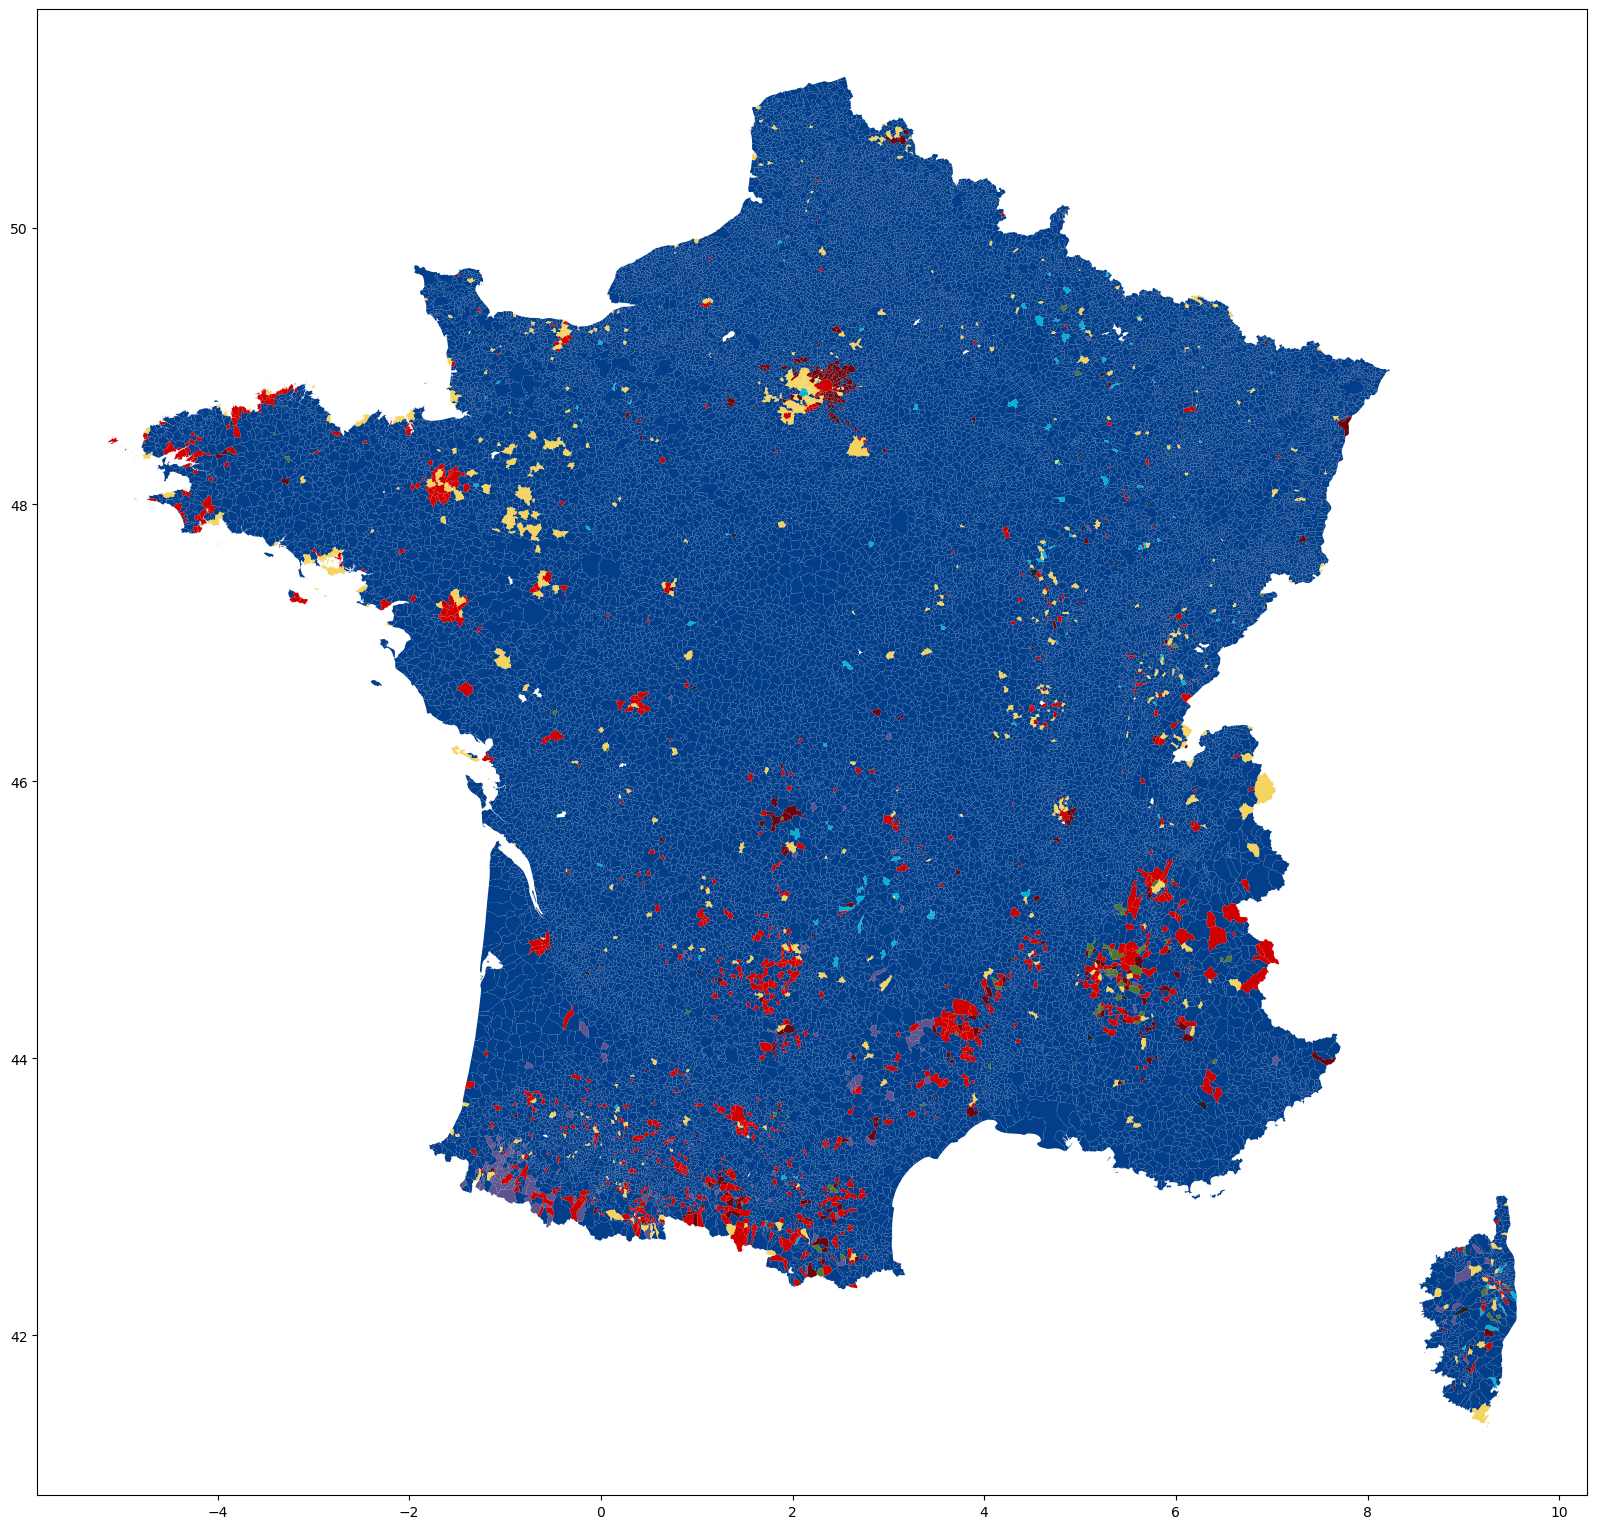

In [4]:
# Convert 'insee' column to strings
gdf['insee'] = gdf['insee'].astype(str)

# Ensure all 'insee' codes are 5 characters long
gdf['insee'] = gdf['insee'].apply(lambda x: x.zfill(5))

# Filter out overseas departments
gdf = gdf[~gdf['insee'].str[:3].isin(['971', '972', '973', '974', '976'])]

# Check unique values in 'nomListe'

# Merge DataFrame with GeoDataFrame
merged = gdf.merge(winning_party, on='insee')

# Define color mapping
color_mapping = {
    # Asselineau
    "LISTE ASSELINEAU-FREXIT" : '#0d1b2a',

    # ED divers
    "L'EUROPE CA SUFFIT !" : '#212529',

    # Zemmour 
    "LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR" : '#212529',

    # Bardella
    'La FRANCE REVIENT': '#023e8a',

    # LR
    "LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE" : '#00b4d8',
    
    # Macron
    "BESOIN D'EUROPE" : '#f4d35e',
    

    
    # PS
    "REVEIL EUR" : '#d00000',

    # Alliance Rurale (Jean Lassale)
    "AR" : '#5e548e',
    # Des randoms
    "PARTI PIRATE" : '#5e548e',

    # EELV
    "EUROPE ÉCOLOGIE" : '#4f772d',
    "EUROPE TERRITOIRES ÉCOLOGIE" : '#4f772d',
    # Ecologie Au Centre
    "EAC" : '#4f772d', 
    
    "LFI - UP" : '#6a040f',
    #Communistes
    "GAUCHE UNIE" : '#6a040f',
    
    "PPL" : '#800000',
    "POUR UNE DEMOCRATIE REELLE : DECIDONS NOUS-MEMES !" : '#FF0000',
    "HUMANITE SOUVERAINE" : '#00FF00',
    "PACE" : '#808000',
    "ÉQUINOXE" : '#808080',
    "ECOLOGIE POSITIVE" : '#C0C0C0',
    "PAIX ET DECROISSANCE" : '#008000',
    "POUR UNE AUTRE EUROPE" : '#800080',
    "LUTTE OUVRIERE" : '#FF00FF',
    "CHANGER L'EUROPE" : '#00FFFF',
    "NLP" : '#FFA500',
    "URGENCE REVOLUTION !" : '#800080',
    "PRENONS-NOUS EN MAIN" : '#808000',
    "FORTERESSE EUROPE" : '#808080',
    "FRANCE LIBRE" : '#800080',
    "LA RUCHE CITOYENNE" : '#FF00FF',
    "DEFENDRE LES ENFANTS" : '#FFA500',
    "DEMOCRATIE REPRESENTATIVE" : '#800000',
    "ESPERANTO" : '#008080',
    "LIBERTÉ DÉMOCRATIQUE FRANÇAISE" : '#808000',
    
    
    "PARTI ANIMALISTE" : '#800080',
    "PARTI REVOLUTIONNAIRE COMMUNISTES" : '#008000',
    "NON À L'UE ET À L'OTAN, COMMUNISTES POUR LA PAIX ET LE PROGRÈS SOCIAL" : '#0000FF',
    "FREE PALESTINE" : '#FFA500',
}

#Apply color mapping to the 'nomListe' column
merged['color'] = merged['nomListe'].map(color_mapping).fillna('#FF0000')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Change the values as needed
merged.plot(color=merged['color'], ax=ax)
plt.show()

In [ ]:
[
  {
    "codeCommune": "01001",
    "nomCommune": "L'Abergement-Clémenciat",
    "inscrits": 662,
    "votants": 373,
    "blancs": 2,
    "abstentions": 289,
    "nuls": 2,
    "exprimes": 369,
    "resultats": [
      {
        "nomListe": "HUMANITE SOUVERAINE",
        "nbVoix": 0
      },
      {
        "nomListe": "POUR UNE DEMOCRATIE REELLE : DECIDONS NOUS-MEMES !",
        "nbVoix": 0
      },
      {
        "nomListe": "LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR",
        "nbVoix": 30
      },
      {
        "nomListe": "LFI - UP",
        "nbVoix": 11
      },
      {
        "nomListe": "La FRANCE REVIENT",
        "nbVoix": 158
      },
      

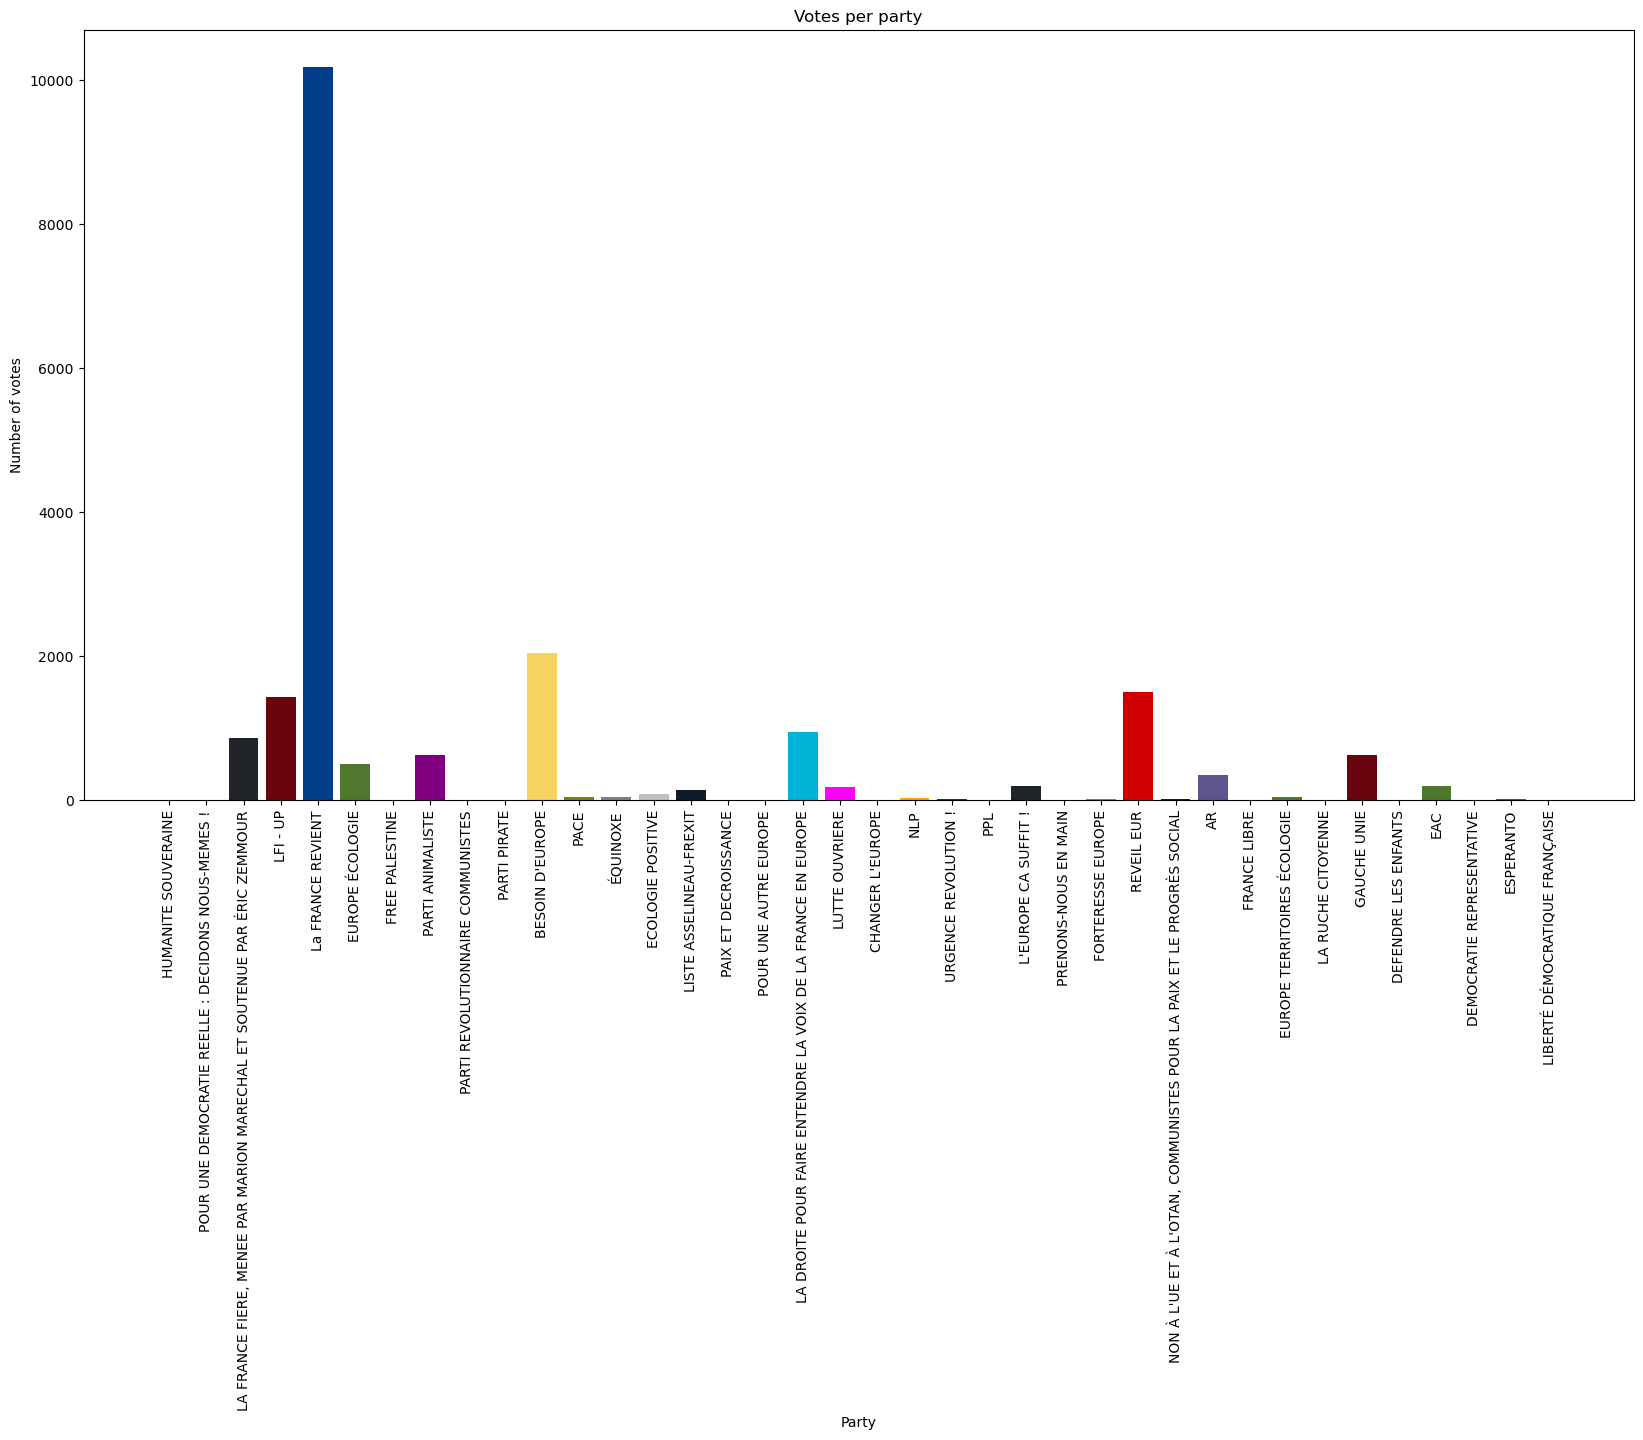

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load communes data
with open('../data/communes.json') as f:
    communes_data = json.load(f)

communes_df = pd.DataFrame(communes_data)

# Assuming `data` is your JSON data
df = pd.json_normalize(data)

def plot_votes(postal_code):
    plt.figure(figsize=(20, 10))
    # Find the commune code using the postal code
    commune_code = communes_df[communes_df['codesPostaux'].apply(lambda x: postal_code in x if isinstance(x, list) else False)]['code'].values[0]    
    commune_data = df[df['codeCommune'] == commune_code]
    if not commune_data.empty:
        resultats_list = commune_data['resultats'].values[0]
        all_resultats_df = pd.DataFrame()
        for resultats in resultats_list:
            if isinstance(resultats, dict):
                resultats_df = pd.DataFrame([resultats])  # Convert the dictionary into a DataFrame
            else:
                resultats_df = pd.DataFrame(resultats)
            all_resultats_df = pd.concat([all_resultats_df, resultats_df])
            votes_per_party = {}
            colors = []

            # Loop over the rows in the DataFrame
            for _, row in all_resultats_df.iterrows():
                # If the party is already in the dictionary, add the votes to its total
                if row['nomListe'] in votes_per_party:
                    votes_per_party[row['nomListe']] += row['nbVoix']
                # If the party is not in the dictionary, add it with its votes
                else:
                    votes_per_party[row['nomListe']] = row['nbVoix']
                colors.append(color_mapping.get(row['nomListe'], '#FF0000'))  # Default to red if the party is not in the mapping

            # Plot the votes for each party
            plt.bar(votes_per_party.keys(), votes_per_party.values(), color=colors)
        plt.title('Votes per party')
        plt.xlabel('Party')
        plt.xticks(rotation='vertical')  # Rotate x-axis labels
        plt.ylabel('Number of votes')
        plt.show()
    else:
        print(f"No data available for commune {commune_code}")

# Call the function with the postal code
plot_votes('62100')